<p>&nbsp;</p>

### **NLP Final Project**

<p>&nbsp;</p>

<font size = "5">

Syracuse University  
IST 736 Text Mining  
Fall 2021

<p>&nbsp;</p>

### **Project Introduction**

<p>&nbsp;</p>

<font size = "5">

Natural language processing (NLP) is a field of study based on the concept of programming computers to process naturally occurring text in a human like way. Believe it or not, the idea of NLP dates back to the mid 1900s before computers were even invented. But this was just speculation at the time. Nobody was certain if or when it would become a reality. Things have gotten a lot clearer since then. A significant amount of progress has been made in NLP thanks to research efforts by leaders in innovation and the help of technology to make those efforts possible. Think about the mass production of text data that has been a byproduct of the internet, cell phones, audio transcription, and social media. With the next generation push towards internet of things, artificial intelligence, and the metaverse, there is plenty of opportunity for NLP to continue to grow.

NLP is a complicated topic that has many different aspects, but some of the foundational concepts that I have learned about in this course include corpus statistics, part of speech tagging, context free grammar, semantics, discourse and dialogue, and sentiment analysis among others. In this project, I will be applying my knowledge on a spam detection dataset. The dataset consists of a corpus of over 5,000 emails from a company called Enron. The dataset was published in 2006 alongside a paper that used the dataset to develop a spam classifier using naive bayes. More information on the dataset can be found here: http://nlp.cs.aueb.gr/software_and_datasets/Enron-Spam/readme.txt.

Spam detection is such a standard task in email systems nowadays that we hardly even have to think about it. And part of the reason we do not have to think about it is because the spam detectors are so effective. But how do these spam detectors actually work? Well, what happens is that each email gets processed behind the scenes and is classified as either spam or non spam before being deposited in either the inbox folder or the spam folder. In this project, I will take a look under the hood and try to build my own spam classifier using machine learning. The goal is to train a model to be able to predict if an email is spam or not spam based on the contents of the email.

Here is what is on the docket for the project. I will start off by importing the necessary Python packages and importing the data. I will then explore and process the email text data, including performing some cleansing operations and feature engineering. From there, I will run a series of experiments. Each experiment will involve training a classifier, but with a slightly different set of features each time. The first experiment will train a classifier with the raw email text without any modifications. This will act as a baseline. In each subsequent classifier, I will add in a modification, such as removing stopwords, adding or removing features, etc. Lastly, I will conclude the project by summarizing and interpreting the results.

<p>&nbsp;</p>

### **Import Packages**

<p>&nbsp;</p>

<font size = "5">

I will start off by loading the necessary packages.

<p>&nbsp;</p>

In [1]:
# Import packages
import pandas
import nltk
import re
import os
import random
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Scikit learn
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

<p>&nbsp;</p>

### **Import Data**

<p>&nbsp;</p>

<font size = "5">

The data for this project can be downloaded from Kaggle via the following page: https://www.kaggle.com/wanderfj/enron-spam. There are 6 different corpuses, "enron1", "enron2", "enron3", "enron4", "enron5", and "enron6". When you download the data from the Kaggle page, it will be downloaded as a zip file called "archive.zip". The "archive.zip" folder contains each of the 6 corpuses. The "archive.zip" folder will need to be unzipped prior to running this code. This can take a while (took about 30 min on my PC). The unzipped folder is just called "archive" without the zip extension.

The following code will read the email data for the spam classification problem from the unzipped "archive" folder. The code assumes that the "archive" folder is located in the current working directory. For anyone trying to reproduce this work in their environment, either make sure that the "archive" folder is located in your current working directory or modify the path accordingly.

Inside the "archive.zip" folder are 6 subfolders for each of the corpuses. Inside each of these corpus subfolders there are 2 subfolders called "spam" and "ham". Inside the "spam" subfolder are individual text files with each text file representing a "spam" email. Inside the "ham" subfolder there are individual text files with each file representing a "ham" email. A "ham" email is a non spam email. Here are the number of emails that are contained within each corpus.

<p>&nbsp;</p>

**Corpus** | **Ham** | **Spam** | **Total** 
-----------|---------|----------|---------- 
enron1     | 3,672   | 1,500    | 5,172  
enron2     | 4,361   | 1,496    | 5,857  
enron3     | 4,012   | 1,500    | 5,512  
enron4     | 1,500   | 4,449*    | 6,000  
enron5     | 1,500   | 3,675    | 5,175  
enron6     | 1,500   | 4,500    | 6,000  
total      | 16,545  | 17,171   | 33,716

<p>&nbsp;</p>

In [2]:
# Specify a list of the names of the enron corpuses
corpuses = ["enron1", "enron2", "enron3", "enron4", "enron5", "enron6"]

# Initiate lists for spam and ham email texts
ham_emails = []; spam_emails = []

# Save the pathway to the current working directory
cwd = os.getcwd()

# Iterate through the list of enron corpuses
for enron in corpuses:

    # Specify the file pathway within the "archive directory"
    # Assumes the "archive" folder is in the CWD
    dirPath = os.path.join(cwd, "archive", enron)

    # Change the CWD to the "archive" directory
    os.chdir(dirPath)

    # Initiate lists for spam and ham email texts
    ham_temp = []; spam_temp = []

    # Process all files in the spam directory
    for file in os.listdir("./spam"):

        # Check if the file extension is ".txt"
        if file.endswith(".txt"):

            # Open file for reading and read entire file into a string
            f = open("./spam/" + file, "r", encoding = "latin-1")
            spam_temp.append(f.read())
            f.close()

    # Process all files in the ham directory
    for file in os.listdir("./ham"):

        # Check if the file extension is ".txt"
        if file.endswith(".txt"):

            # Open file for reading and read entire file into a string
            f = open("./ham/"+file, 'r', encoding="latin-1")
            ham_temp.append(f.read())
            f.close()

    # Append to the main spam and ham lists
    spam_emails += spam_temp
    ham_emails += ham_temp

    # print number emails read
    print("Corpus: ", enron, "\n")
    print("Number of spam files: ", len(spam_temp))
    print("Number of ham files: ", len(ham_temp), "\n")

Corpus:  enron1 

Number of spam files:  1500
Number of ham files:  3672 

Corpus:  enron2 

Number of spam files:  1496
Number of ham files:  4361 

Corpus:  enron3 

Number of spam files:  1500
Number of ham files:  4012 

Corpus:  enron4 

Number of spam files:  4499
Number of ham files:  1500 

Corpus:  enron5 

Number of spam files:  3675
Number of ham files:  1500 

Corpus:  enron6 

Number of spam files:  4500
Number of ham files:  1500 



<p>&nbsp;</p>

<font size = "5">

Note: I noticed that in the "enron4" corpus, there are supposed to be 4,500 "spam" emails (according to the documentation), but there are only 4,449. There is one email missing. This should not have any effect on the results of the analysis but I thought I would mention it as an FYI.

The previous code generated 2 lists. One list contains the raw text from the "spam" emails and the other list contains the raw text from the "ham" emails. Let's take a look at what some of the emails look like (each email truncated to the first 500 characters to save space).

<p>&nbsp;</p>

In [3]:
# Print out a few examples of ham emails
print(ham_emails[0][0:500], "\n")
print(ham_emails[1][0:500], "\n")
print(ham_emails[16544][0:500], "\n")
print(ham_emails[16543][0:500], "\n")

Subject: christmas tree farm pictures
 

Subject: vastar resources , inc .
gary , production from the high island larger block a - 1 # 2 commenced on
saturday at 2 : 00 p . m . at about 6 , 500 gross . carlos expects between 9 , 500 and
10 , 000 gross for tomorrow . vastar owns 68 % of the gross production .
george x 3 - 6992
- - - - - - - - - - - - - - - - - - - - - - forwarded by george weissman / hou / ect on 12 / 13 / 99 10 : 16
am - - - - - - - - - - - - - - - - - - - - - - - - - - -
daren j farmer
12 / 10 / 99 10 : 38 am
to : car 

Subject: fw : re ivanhoe e . s . d
fyi , kim .
- - - - - original message - - - - -
from : frazier , perry
sent : thursday , march 07 , 2002 2 : 25 pm
to : lebeau , randy ; watson , kimberly ; abdmoulaie , mansoor
subject : re : re ivanhoe e . s . d
just a couple of additional thoughts , the cost estimate for esd mods of $ 130 , 000 will typically be , about 25 % more . the e abdmoulaie , mansoor ; frazier , perry
subject : fw : re ivanhoe e . s . d
he

In [4]:
# Print out a few examples of spam emails
print(spam_emails[0][0:500], "\n")
print(spam_emails[1][0:500], "\n")
print(spam_emails[17169][0:500], "\n")
print(spam_emails[17168][0:500], "\n")

Subject: dobmeos with hgh my energy level has gone up ! stukm
introducing
doctor - formulated
hgh
human growth hormone - also called hgh
is referred to in medical science as the master hormone . it is very plentiful
when we are young , but near the age of twenty - one our bodies begin to produce
less of it . by the time we are forty nearly everyone is deficient in hgh ,
and at eighty our production has normally diminished at least 90 - 95 % .
advantages of hgh :
- increased muscle strength
- los 

Subject: your prescription is ready . . oxwq s f e
low cost prescription medications
soma , ultram , adipex , vicodin many more
prescribed online and shipped
overnight to your door ! !
one of our us licensed physicians will write an
fda approved prescription for you and ship your
order overnight via a us licensed pharmacy direct
to your doorstep . . . . fast and secure ! !
click here !
no thanks , please take me off your list
ogrg z
lqlokeolnq
lnu 

Subject: dear sir , i am interested in it
h

<p>&nbsp;</p>

<font size = "5">

Some initial observations from looking at the emails.

**(a)** Each email consists of a subject line and email body. I think that it could be helpful to distinguish these when training a model because the subject lines of a "spam" email are likely different from those of a "ham" email.

**(b)** Some of the "ham" emails are forwarded emails and contain multiple emails chained together. The email chain in forwarded emails appear to contain a "to", a "from", a "cc", and timestamps in the email chain.

**(c)** Anecdotally, I think that "spam" emails seem to have more punctuation in them (for example excessive exclamation points), they tend to have more typos than "ham" emails (mispelled words, words stuck together, non words, etc.), and they can contain inappropriate content (swear words, etc.).

**(d)** The context of a "spam" email is different than the context of a "ham" email. For example, "spam" emails are typically propaganda or trying to sell something.

**(e)** The text is already in lowercase format. The reason I point this out is because it might have been helpful to consider pronouns in the text, but that will not be an option if the capitalization is not present.

In the next bit of code, I will engineer some new features based on these observations such splitting up the subject line and email body, whether the email is a forwarded email or not, as well as a "cleaned" version of the emails. These features will be incorporated later on in the experiments.

<p>&nbsp;</p>

### **Separate the Subject Line and Email Body**

<p>&nbsp;</p>

<font size = "5">

I will extract the subject line and the email body from each email. One of the experiments will incorporate this in the spam classifier. In the following code, I will iterate through every email and use regular expression to extract the subject line and the email body. I will first define 2 functions, one for extracting the subject line and one for extracting the email body, then I will use these functions on the emails.

<p>&nbsp;</p>

In [5]:
# Define a function to extract the subject

"""
The "get_subject" function takes in the raw text of an email,
turns it into a list with each component of the list being
a line from the email, checks each line, and the first line
that starts with "subject" or "Subject" (difference being
lowercase or uppercase) will be returned.
"""

def get_subject(text):
    textsplit = text.split("\n")
    for line in textsplit:
        if line.lower().startswith("subject:"):
            subject = re.findall("[sS]ubject: (.*)", line)[0]
            return subject

In [6]:
# Define a function to extract the body

"""
The "get_body" function takes in the raw text of an email
and turns it into a list with each component of the list being
a line from the email. A new list is formed which comtains
all of the lines that are not the subject line. The new
list is then converted into a text string (with the line
breaks back in tact) and returns it.
"""

def get_body(text):
    textsplit = text.split("\n")
    textlist = []
    linecount = 0
    for line in textsplit:
        if not line.lower().startswith("subject:") and linecount != 0:
            textlist.append(line)
        linecount += 1
    return "\n".join(textlist)

In [7]:
# Extract the subjects from the ham emails
ham_subjects = []
for email in ham_emails:
    ham_subjects.append(get_subject(email))

In [8]:
# Extract the bodies from the ham emails
ham_bodies = []
for email in ham_emails:
    ham_bodies.append(get_body(email))

In [9]:
# Print out a few examples of ham subject lines
print(ham_subjects[1000], "\n")
print(ham_subjects[2000], "\n")
print(ham_subjects[3000], "\n")
print(ham_subjects[4000], "\n")
print(ham_subjects[5000], "\n")

resume - gloria davis 

enron / hpl nom for november 9 , 2000 

re : nom / actual flow for april 4 th 

invitation to sunday dinner with vince @ 6 . 30 pm 

associate prc , martin lin 



In [10]:
# Extract the subjects from the ham emails
spam_subjects = []
for email in spam_emails:
    spam_subjects.append(get_subject(email))

In [11]:
# Extract the bodies from the ham emails
spam_bodies = []
for email in spam_emails:
    spam_bodies.append(get_body(email))

In [12]:
# Print out a few examples of spam subject lines
print(spam_subjects[1000], "\n")
print(spam_subjects[2000], "\n")
print(spam_subjects[3000], "\n")
print(spam_subjects[4000], "\n")
print(spam_subjects[5000], "\n")

get laid tonight : do you need someone to touch 

great news from your bank 

from mr . daniel mutade 

reply : cute jenna leews soletn potohs 

your expiring auto warranty 



<p>&nbsp;</p>

<font size = "5">

By looking at the subject lines in the "ham" emails and the subject lines in the "spam" emails, I can confirm my observation that the content in these subject lines are different. I think that the subject lines in the "ham" emails will be very domain specific. They will be related specifically to business at Enron or events that are happening at Enron. The "spam" emails will have a very random subject line that has nothing to do with Enron.

<p>&nbsp;</p>

### **Check if an Email is Forwarded**

<p>&nbsp;</p>

<font size = "5">

As I made note of earlier, some of the "ham" emails are forwarded emails. You can tell this because they contain delimiters with a bunch of "-" characters and "forwarded" in the same line. I will use this to identify emails that are forwarded and emails that are not forwarded. This operation will be similar to what I did when separating the subject line and email body.

<p>&nbsp;</p>

In [13]:
# Define a function to check if an email is forwarded

"""
The "check_forward" function takes in the raw text of an email
and turns it into a list with each component of the list being
a line from the email. For each line, Two logical tests are
conducted. The first test checks if the line starts with a "-"
character. This is a sign that the line is a delimiter, and
delimiter lines are contained in forwarded emails. The second
test checks if the line contains the word "forwarded". This
is also a sign that the email is a forwarded email. If both
of these tests come back as true for any of the lines in the
email, then the email is classified as a forwarded email.
"""

def check_forward(text):
    textsplit = text.split("\n")
    isforwarded = False
    for line in textsplit:
        dashtest = line.startswith("-")
        fwdtest = bool(re.search("forwarded", line))
        if dashtest and fwdtest:
            isforwarded = True
    return isforwarded

In [14]:
# Check all the ham emails if they were forwarded
ham_forwarded = []
for email in ham_bodies:
    ham_forwarded.append(check_forward(email))

In [15]:
# How many of the ham emails were forwarded?
print(sum(ham_forwarded), " / ", len(ham_forwarded))

2629  /  16545


In [16]:
# Check all the spam emails if they were forwarded
spam_forwarded = []
for email in spam_bodies:
    spam_forwarded.append(check_forward(email))

In [17]:
# How many of the ham emails were forwarded?
print(sum(spam_forwarded), " / ", len(spam_forwarded))

0  /  17170


<p>&nbsp;</p>

<font size = "5">

As expected, there are a number of "ham" emails that are forwarded emails (2,629 out of 16,545 emails) but there are not any "spam" emails that are forwarded emails (0 out of 17,170 emails). 

<p>&nbsp;</p>

### **Cleaned Version of Emails**

<p>&nbsp;</p>

<font size = "5">

Some of the emails (primarily forwarded emails it seems), contain "cc", "to", and "from" lines, along with timestamp lines. The content of these lines mainly contains names, symbols, numbers, etc. I think that this could be more like noise rather than any meaningful information that the classifier can learn from. Thus, my hypothesis is that removing these lines could improve the accuracy of the spam classifier. That hypothesis will be tested later on in the experiments. Through observation, I also came across some other things that I will clean up. In the following code, I will create cleaned versions of the emails. But first, here is an overview of what I will be cleaning in this step.

(1) Lines that start with "cc". Indicates the names of people who are copied on the email.

(2) Lines that start with "subject". The initial subject line has already been extracted but this will take care of subject lines that are repeated in the email body. This occurs in forwarded emails.

(3) Lines that start with "to". Indicates the names of people who the email is sent to.

(4) Lines that start with "from". Indicates the name of the person who the email was sent from.

(5) Lines that start with a "/" character. Indicates that the line is a timestamp line.

(6) Lines that start with a "-" character. Indicates that the line is a delimiter line in a forwarded email.

(7) Lines that start with "am -". Indicates that the line is a delimiter line in a forwarded email.

(8) Lines that start with a "|" character. Indicates the start of a row in an an embedded table in the email.

(9) Lines that end with a ",". Indicate a greeting line in an email. For example, a lot of emails start with a line such as "Hi (enter name here),".

(10) Lines that start with a number. Indicates that the line is a timestamp line.

<p>&nbsp;</p>

In [18]:
# Define a function to clean an email

"""
The "clean_email" function takes in the raw text of an email
and turns it into a list with each component of the list being
a line from the email. For each line, 10 logical tests are
conducted. If any of the tests for a line come back true,
then that line is removed from the text. Only lines where
none of the tests are true will the line be kept. The function
returns the text with the removed lines.
"""

def clean_email(text):
    textsplit = text.split("\n")
    textlist = []
    for line in textsplit:
        t1 = bool(line.lower().startswith("cc"))
        t2 = bool(line.lower().startswith("subject"))
        t3 = bool(line.lower().startswith("to"))
        t4 = bool(line.lower().startswith("from"))
        t5 = bool(line.lower().startswith("/"))
        t6 = bool(line.lower().startswith("-"))
        t7 = bool(line.lower().startswith("am -"))
        t8 = bool(line.lower().startswith("|"))
        t9 = bool(line.lower().endswith(","))
        t10 = bool(re.search("^[0-9]", line))
        if sum([t1, t2, t3, t4, t5, t6, t7, t8, t9, t10]) == 0:
            textlist.append(line)
    return "\n".join(textlist)

In [19]:
# Create a cleaned version of the "ham" emails
ham_cleaned = []
for email in ham_bodies:
    ham_cleaned.append(clean_email(email))

In [20]:
# Create a cleaned version of the "spam" emails
spam_cleaned = []
for email in spam_bodies:
    spam_cleaned.append(clean_email(email))

In [21]:
# Show an example of a raw email
print("EXAMPLE OF A RAW EMAIL", "\n")
print(ham_bodies[1][0:1000])

EXAMPLE OF A RAW EMAIL 

gary , production from the high island larger block a - 1 # 2 commenced on
saturday at 2 : 00 p . m . at about 6 , 500 gross . carlos expects between 9 , 500 and
10 , 000 gross for tomorrow . vastar owns 68 % of the gross production .
george x 3 - 6992
- - - - - - - - - - - - - - - - - - - - - - forwarded by george weissman / hou / ect on 12 / 13 / 99 10 : 16
am - - - - - - - - - - - - - - - - - - - - - - - - - - -
daren j farmer
12 / 10 / 99 10 : 38 am
to : carlos j rodriguez / hou / ect @ ect
cc : george weissman / hou / ect @ ect , melissa graves / hou / ect @ ect
subject : vastar resources , inc .
carlos ,
please call linda and get everything set up .
i ' m going to estimate 4 , 500 coming up tomorrow , with a 2 , 000 increase each
following day based on my conversations with bill fischer at bmar .
d .
- - - - - - - - - - - - - - - - - - - - - - forwarded by daren j farmer / hou / ect on 12 / 10 / 99 10 : 34
am - - - - - - - - - - - - - - - - - - - - - - - 

In [22]:
# Show the cleaned version of that email
print("CLEANED VERSION OF THE EMAIL", "\n")
print(clean_email(ham_bodies[1])[0:1000])

CLEANED VERSION OF THE EMAIL 

gary , production from the high island larger block a - 1 # 2 commenced on
saturday at 2 : 00 p . m . at about 6 , 500 gross . carlos expects between 9 , 500 and
george x 3 - 6992
daren j farmer
please call linda and get everything set up .
i ' m going to estimate 4 , 500 coming up tomorrow , with a 2 , 000 increase each
following day based on my conversations with bill fischer at bmar .
d .
enron north america corp .
the attached appears to be a nomination from vastar resources , inc . for the
high island larger block a - 1 # 2 ( previously , erroneously referred to as the
# 1 well ) . vastar now expects the well to commence production sometime
control so she can provide notification of the turn - on tomorrow . linda ' s
numbers , for the record , are 281 . 584 . 3359 voice and 713 . 312 . 1689 fax .
would you please see that someone contacts linda and advises her how to
submit future nominations via e - mail , fax or voice ? thanks .
george x 3 - 6992
"

<p>&nbsp;</p>

<font size = "5">

This is just one example of cleaning an email that I found depicts the idea well. There are many more examples of these kinds of emails in the dataset. The cleaned email is not perfect, for example the line that contains just "d ." could be removed or the line that contains "george x 3 - 6992" could be removed. But for now, I will leave these. I just wanted to point that out to get the idea across.

<p>&nbsp;</p>

### **Experiments**

<p>&nbsp;</p>

<font size = "5">

As mentioned in the introduction, the experiments section will be comprised of a series of experiments which involve training spam classifiers. Each classifier will be trained and evaluated using a 3 fold cross validation. Models will be assessed using 4 metrics - accuracy, precision, recall, and F-measure.

Before we get started with the experiments, I will need to split the data into respective cross validation sets so that all of the experiments are consistent in that they use the same data. Otherwise, it would be like comparing apples to oranges and we want to be comparing apples to apples. A stratified sampling approach will be used to ensure that the ratio of spam to ham emails in each set is the same.

In the following code, I will conduct sampling to get the indices of each respective cross validation set. I will then pack everything that has been done so far (i.e. raw email, cleaned email, subject line, etc.) into a pandas dataframe. Having everything in one place will make it easy to grab the pieces that I need for each experiment and it will also reduce code redundancy.

<p>&nbsp;</p>

In [23]:
# Set the random seed for reproduceability
random.seed(42)

# Initiate empty lists to hold the indices of the cv sets
ham_set1 = []; spam_set1 = []
ham_set2 = []; spam_set2 = []
ham_set3 = []; spam_set3 = []

# Create a list of ham indices (0 through 3671)
ham_indices = list(range(0, len(ham_emails)))

# Create a list of spam indices (0 through 1499)
spam_indices = list(range(0, len(spam_emails)))

# Sample the ham indices
while len(ham_indices) > 0:
    for setnumber in [1, 2, 3]:
        sample = random.sample(list(range(0, len(ham_indices))), 1)[0]
        del ham_indices[sample]
        if setnumber == 1:
            ham_set1.append(sample)
        elif setnumber == 2:
            ham_set2.append(sample)
        else:
            ham_set3.append(sample)

# Sample the spam indices
# Have to remove one due to the missing email
while len(spam_indices) > 1:
    for setnumber in [1, 2, 3]:
        sample = random.sample(list(range(0, len(spam_indices))), 1)[0]
        del spam_indices[sample]
        if setnumber == 1:
            spam_set1.append(sample)
        elif setnumber == 2:
            spam_set2.append(sample)
        else:
            spam_set3.append(sample)

In [24]:
# Save a list of the column names for the dataframe
columns = ["CVSet", "RawEmail", "RawEmailSubject",
"RawEmailBody", "IsForwarded", "CleanedEmailBody", "Label"]

In [25]:
# Pack together set 1 ham emails
hamemaildf1 = pandas.DataFrame(list(zip(
    [1 for i in range(0, len(ham_set1))],
    [ham_emails[i] for i in ham_set1],
    [ham_subjects[i] for i in ham_set1],
    [ham_bodies[i] for i in ham_set1],
    [ham_forwarded[i] for i in ham_set1],
    [ham_cleaned[i] for i in ham_set1],
    ["ham" for i in range(0, len(ham_set1))])),
    columns = columns)

In [26]:
# Pack together set 2 ham emails
hamemaildf2 = pandas.DataFrame(list(zip(
    [2 for i in range(0, len(ham_set2))],
    [ham_emails[i] for i in ham_set2],
    [ham_subjects[i] for i in ham_set2],
    [ham_bodies[i] for i in ham_set2],
    [ham_forwarded[i] for i in ham_set2],
    [ham_cleaned[i] for i in ham_set2],
    ["ham" for i in range(0, len(ham_set2))])),
    columns = columns)

In [27]:
# Pack together set 3 ham emails
hamemaildf3 = pandas.DataFrame(list(zip(
    [3 for i in range(0, len(ham_set3))],
    [ham_emails[i] for i in ham_set3],
    [ham_subjects[i] for i in ham_set3],
    [ham_bodies[i] for i in ham_set3],
    [ham_forwarded[i] for i in ham_set3],
    [ham_cleaned[i] for i in ham_set3],
    ["ham" for i in range(0, len(ham_set3))])),
    columns = columns)

In [28]:
# Pack together set 1 spam emails
spamemaildf1 = pandas.DataFrame(list(zip(
    [1 for i in range(0, len(spam_set1))],
    [spam_emails[i] for i in spam_set1],
    [spam_subjects[i] for i in spam_set1],
    [spam_bodies[i] for i in spam_set1],
    [spam_forwarded[i] for i in spam_set1],
    [spam_cleaned[i] for i in spam_set1],
    ["spam" for i in range(0, len(spam_set1))])),
    columns = columns)

In [29]:
# Pack together set 2 spam emails
spamemaildf2 = pandas.DataFrame(list(zip(
    [2 for i in range(0, len(spam_set2))],
    [spam_emails[i] for i in spam_set2],
    [spam_subjects[i] for i in spam_set2],
    [spam_bodies[i] for i in spam_set2],
    [spam_forwarded[i] for i in spam_set2],
    [spam_cleaned[i] for i in spam_set2],
    ["spam" for i in range(0, len(spam_set2))])),
    columns = columns)

In [30]:
# Pack together set 3 spam emails
spamemaildf3 = pandas.DataFrame(list(zip(
    [3 for i in range(0, len(spam_set3))],
    [spam_emails[i] for i in spam_set3],
    [spam_subjects[i] for i in spam_set3],
    [spam_bodies[i] for i in spam_set3],
    [spam_forwarded[i] for i in spam_set3],
    [spam_cleaned[i] for i in spam_set3],
    ["spam" for i in range(0, len(spam_set3))])),
    columns = columns)

In [31]:
# Create one dataframe with everything
emaildf = pandas.concat([
    hamemaildf1,
    hamemaildf2,
    hamemaildf3,
    spamemaildf1,
    spamemaildf2,
    spamemaildf3
])

<p>&nbsp;</p>

### **Experiment 1: Baseline Experiment**

<p>&nbsp;</p>

<font size = "5">

The baseline experiment will simply use the raw text from the emails to train a classifer. The text will be vectorized using the scikit learn CountVectorizer function with all of the default parameters (other than the encoding which is set to "latin-1").

<p>&nbsp;</p>

In [32]:
# Initiate a vectorizer
vectorizer = CountVectorizer(encoding = "latin-1")

Fold  1  Classification Report: 

              precision    recall  f1-score   support

         ham     0.9866    0.9897    0.9881      5515
        spam     0.9900    0.9871    0.9885      5723

    accuracy                         0.9883     11238
   macro avg     0.9883    0.9884    0.9883     11238
weighted avg     0.9883    0.9883    0.9883     11238
 

Fold  1  Top 100 Most Informative Features for Spam Emails 

['pills', 'td', 'nbsp', 'viagra', 'width', 'computron', 'cialis', 'href', 'meds', 'spam', 'src', 'xp', 'paliourg', 'voip', 'macromedia', 'photoshop', '2005', 'adobe', '2004', 'div', 'drugs', 'bgcolor', 'ooking', 'wiil', 'pharmacy', 'prescription', 'br', 'xanax', 'height', 'logos', 'php', 'valium', 'lottery', 'penis', 'softwares', 'gr', 'pill', 'sex', 'eogi', '0310041', 'stationery', 'moopid', 'paypal', 'demokritos', 'iit', 'materia', 'dose', 'wysak', 'img', 'htmlimg', 'yap', 'ur', 'darial', 'fontfont', 'rolex', 'que', 'oniine', 'serial', 'ail', 'internationa', 'gra', 'r

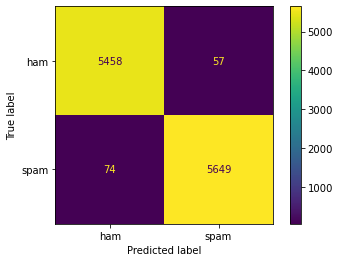

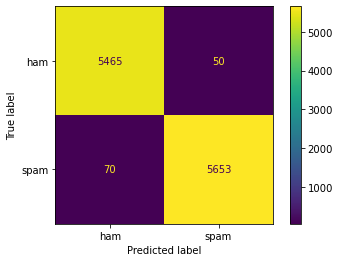

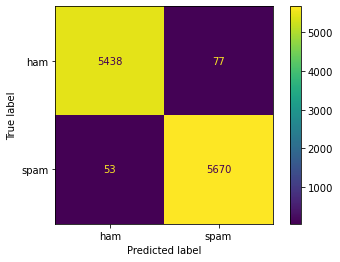

In [34]:
# Iterate through fold 1, 2, and 3
for cv in [1, 2, 3]:

    # When cv = 1, fold 1 & and 2 are used for training and fold 3 is used for testing
    if cv == 1:
        X_train = emaildf[emaildf.CVSet != 3].RawEmail
        X_test = emaildf[emaildf.CVSet == 3].RawEmail
        y_train = emaildf[emaildf.CVSet != 3].Label
        y_test = emaildf[emaildf.CVSet == 3].Label

    # When cv = 2, fold 2 & 3 are used for training and fold 1 is used for testing
    elif cv == 2:
        X_train = emaildf[emaildf.CVSet != 1].RawEmail
        X_test = emaildf[emaildf.CVSet == 1].RawEmail
        y_train = emaildf[emaildf.CVSet != 1].Label
        y_test = emaildf[emaildf.CVSet == 1].Label

    # When cv = 3, fold 3 & 1 are used for training and fold 2 is used for testing
    else:
        X_train = emaildf[emaildf.CVSet != 2].RawEmail
        X_test = emaildf[emaildf.CVSet == 2].RawEmail
        y_train = emaildf[emaildf.CVSet != 2].Label
        y_test = emaildf[emaildf.CVSet == 2].Label

    # Vectorize the train data
    X_train_vec = vectorizer.fit_transform(X_train)

    # Vectorize the test data
    X_test_vec = vectorizer.transform(X_test)

    # Initiate a multinomial naive bayes model
    model = MultinomialNB()

    # Fit the model on the train data
    model.fit(X_train_vec, y_train)

    # Make predictions based on the test data
    y_pred = model.predict(X_test_vec)

    # Print out the classification report for the current fold
    print("Fold ", cv, " Classification Report:", "\n")
    print(classification_report(y_test, y_pred, digits = 4), "\n")

    # Print out a confusion matrix for the current fold
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ["ham", "spam"]).plot()

    # Create a dataframe with ham and spam log probabilities by word
    feature_log_ratio = pandas.DataFrame(list(zip(
    model.feature_log_prob_[0],
    model.feature_log_prob_[1],
    vectorizer.get_feature_names_out())),
    columns = ["ham", "spam", "token"])

    # Add a column for the ratio
    feature_log_ratio["ratio"] = feature_log_ratio["ham"] / feature_log_ratio["spam"]

    # Sort the dataframe by ratio in descending order
    feature_log_ratio.sort_values(by = "ratio", ascending = False, inplace = True)

    # Print out the top 100
    print("Fold ", cv, " Top 100 Most Informative Features for Spam Emails", "\n")
    print(list(feature_log_ratio.head(100).token), "\n")

    # Print out the bottom 100
    print("Fold ", cv, " Top 100 Most Informative Features for Ham Emails", "\n")
    print(list(feature_log_ratio.tail(100).token), "\n")

<p>&nbsp;</p>

### **Experiment 1 Summary Table**

<font size = "5">

Average accuracy = 98.87%

**Class** | **Measure** | **Average** |  
----------|-------------|-------------|  
ham       | precision   | 98.81%
spam      | precision   | 98.93%
ham       | recall      | 98.89%
spam      | recall      | 98.85%
ham       | f-measure   | 98.85%
spam      | f-measure   | 98.89%

<p>&nbsp;</p>

<font size = "5">

I was a little bit surprised at first to see that the accuracy was nearly 99% from using just the raw text from the emails. But by looking at the most informative words, it is evident that the model was able to pick up on the differences. With this model, there are only around 127 misclassified emails on average per 11,238 emails. Type I errors (false positive: thought it was a spam email but it was actually a ham email) make up for about 61 of those misclassifications. Type II errors (false negative: thought it was a ham email but it was actually a spam email) make up for about the other 66 misclassifications. So, the number of Type I errors and Type II errors are roughly the same. Also, the precision, recall, and f-measure scores are all close to each other. This means that the model is not swinging too heavily in one direction which is a good thing because it means that it is unbiased. But I would still to see if there is room for improvement.

<p>&nbsp;</p>

### **Experiment 2: Using the Cleaned Emails Instead of Raw Emails**

<p>&nbsp;</p>

<font size = "5">

In experiment 2, I will be training the naive bayes classifier using the cleaned emails instead of the raw emails to see if the results are improved. The hypothesis is that the cleaned emails have less noise in them which could reduce the confusion in the model. If you need a refresher on what the cleaned emails are please refer back to that section. 

<p>&nbsp;</p>

In [38]:
# Initiate a vectorizer
vectorizer = CountVectorizer(encoding = "latin-1")

Fold  1  Classification Report: 

              precision    recall  f1-score   support

         ham     0.9856    0.9837    0.9847      5515
        spam     0.9843    0.9862    0.9852      5723

    accuracy                         0.9850     11238
   macro avg     0.9850    0.9849    0.9850     11238
weighted avg     0.9850    0.9850    0.9850     11238
 

Fold  1  Top 100 Most Informative Features for Spam Emails 

['td', 'nbsp', 'pills', 'width', 'viagra', 'computron', 'href', 'cialis', 'src', 'voip', 'spam', 'macromedia', 'meds', 'font', 'photoshop', 'xp', 'wi', 'adobe', 'bgcolor', 'br', 'ooking', 'wiil', '2005', 'height', 'div', 'drugs', '2004', 'php', '0310041', 'paliourg', 'eogi', 'materia', 'lottery', 'moopid', 'prescription', 'penis', 'htmlimg', 'logos', '000000', 'pharmacy', 'paypal', 'softwares', 'yap', 'dose', 'img', 'xanax', 'biz', 'wysak', 'valium', 'stationery', 'ur', 'resuits', 'que', 'darial', 'internationa', 'vnbl', 'gr', 'gif', 'ail', 'sex', 'pill', 'serial', 'new

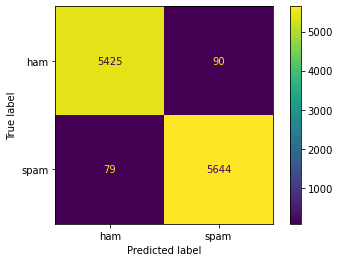

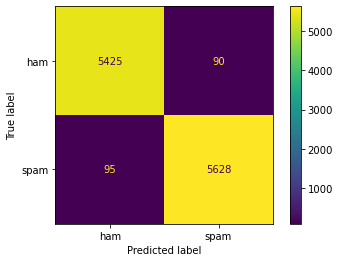

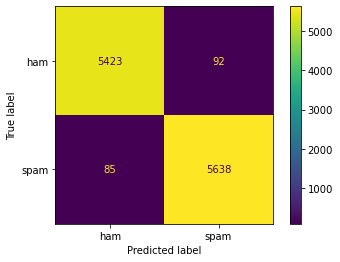

In [39]:
# Iterate through fold 1, 2, and 3
for cv in [1, 2, 3]:

    # When cv = 1, fold 1 & and 2 are used for training and fold 3 is used for testing
    if cv == 1:
        X_train = emaildf[emaildf.CVSet != 3].CleanedEmailBody
        X_test = emaildf[emaildf.CVSet == 3].CleanedEmailBody
        y_train = emaildf[emaildf.CVSet != 3].Label
        y_test = emaildf[emaildf.CVSet == 3].Label

    # When cv = 2, fold 2 & 3 are used for training and fold 1 is used for testing
    elif cv == 2:
        X_train = emaildf[emaildf.CVSet != 1].CleanedEmailBody
        X_test = emaildf[emaildf.CVSet == 1].CleanedEmailBody
        y_train = emaildf[emaildf.CVSet != 1].Label
        y_test = emaildf[emaildf.CVSet == 1].Label

    # When cv = 3, fold 3 & 1 are used for training and fold 2 is used for testing
    else:
        X_train = emaildf[emaildf.CVSet != 2].CleanedEmailBody
        X_test = emaildf[emaildf.CVSet == 2].CleanedEmailBody
        y_train = emaildf[emaildf.CVSet != 2].Label
        y_test = emaildf[emaildf.CVSet == 2].Label

    # Vectorize the train data
    X_train_vec = vectorizer.fit_transform(X_train)

    # Vectorize the test data
    X_test_vec = vectorizer.transform(X_test)

    # Initiate a multinomial naive bayes model
    model = MultinomialNB()

    # Fit the model on the train data
    model.fit(X_train_vec, y_train)

    # Make predictions based on the test data
    y_pred = model.predict(X_test_vec)

    # Print out the classification report for the current fold
    print("Fold ", cv, " Classification Report:", "\n")
    print(classification_report(y_test, y_pred, digits = 4), "\n")

    # Print out a confusion matrix for the current fold
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ["ham", "spam"]).plot()

    # Create a dataframe with ham and spam log probabilities by word
    feature_log_ratio = pandas.DataFrame(list(zip(
    model.feature_log_prob_[0],
    model.feature_log_prob_[1],
    vectorizer.get_feature_names_out())),
    columns = ["ham", "spam", "token"])

    # Add a column for the ratio
    feature_log_ratio["ratio"] = feature_log_ratio["ham"] / feature_log_ratio["spam"]

    # Sort the dataframe by ratio in descending order
    feature_log_ratio.sort_values(by = "ratio", ascending = False, inplace = True)

    # Print out the top 100
    print("Fold ", cv, " Top 100 Most Informative Features for Spam Emails", "\n")
    print(list(feature_log_ratio.head(100).token), "\n")

    # Print out the bottom 100
    print("Fold ", cv, " Top 100 Most Informative Features for Ham Emails", "\n")
    print(list(feature_log_ratio.tail(100).token), "\n")

<p>&nbsp;</p>

### **Experiment 2 Summary Table**

<font size = "5">

Average accuracy = 98.42%

**Class** | **Measure** | **Average** |  
----------|-------------|-------------|  
ham       | precision   | 98.43%
spam      | precision   | 98.42%
ham       | recall      | 98.36%
spam      | recall      | 98.49%
ham       | f-measure   | 98.39%
spam      | f-measure   | 98.45%

<p>&nbsp;</p>

<font size = "5">

I was expecting that the accuracy from using the cleaned emails vs the raw emails would have been better, but that is not the case. The accuracy went down by roughly 0.40%. Using the cleaned emails, there are about 177 misclassifications per 11,238 emails (about 50 more misclassifications than experiment 1). It does not sound like much but it is actually almost 50% more misclassifications than experiment 1. This is a sign that there was lost information from cleaning the emails. One possible reason for this is that I went too aggressive in my email cleaning methods. In the next experiment, I will try removing names, numbers, and stopwords before training the model.

<p>&nbsp;</p>

### **Experiment 3: Removing Names, Numbers, and Stop Words**

<p>&nbsp;</p>

<font size = "5">

In experiment 3, I will try removing names, numbers, and stop words from the email text prior to training the model. What do I mean by names, numbers, and stop words? More on that soon. The idea here is similar to the idea from experiment 2 in that it should reduce the noise in the data hence improve the results. But we will soon test that theory.

<p>&nbsp;</p>

In [40]:
# Get a list of peoples names by looking at "to", "from", and "cc" lines

"""
The "get_names" function takes in the raw text of an email
and turns it into a list with each component of the list being
a line from the email. For each line, 3 logical tests are
conducted to see if the line is a "to", "from", or "cc" line.
If yes, then the content from the line will be extracted and
tokenized. The result is a list of names of people. This is
then appended to a main list and the main list is returned
after all iterations are complete.

"""

def get_names(text):
    textsplit = text.split("\n")
    nameslist = []
    for line in textsplit:
        linelower = line.lower()
        t1 = bool(linelower.startswith("cc :"))
        t2 = bool(linelower.startswith("to :"))
        t3 = bool(linelower.startswith("from :"))
        if t1:
            names = re.findall("cc(.*)", linelower)[0]
        elif t2:
            names = re.findall("to(.*)", linelower)[0]
        elif t3:
            names = re.findall("from(.*)", linelower)[0]
        else:
            continue
        nametokens = nltk.word_tokenize(names)
        nameslist += nametokens
    return nameslist

In [41]:
# Use the get_names function on the ham emails
names = []
for email in ham_emails:
    names += get_names(email)

In [42]:
# Make the list of names unique
names = list(set(names))

In [43]:
# How many names were captured?
print(len(names))

6646


In [44]:
# Print out some examples of the names
print(names[0:200])

['myers', 'tamez', 'talvitie', 'tseng', 'sr', 'mulligan', 'enserch', 'elf', 'takriti', 'danilov', 'cbwhitta', 'elafandi', 'ranjan', 'opriskl', '53', 'unseen', 'vtaylor', 'g', 'ram', 'kohli', 'mercy', 'goben', 'watkins', 'covington', 'janet', 'kskinner', 'bangle', 'farley', 'sewell', 'cingular', 'mao', 'plemons', 'cobs', 'nanci', 'flood', 'scada', 'jbouill', 'mirant', 'marathonoil', '915', 'weatherstone', 'nina', 'fotiou', 'abercrombie', 'lamas', 'radu', 'casari', 'mara', 'jubran', 'resources', 'accounting', 'castell', 'fpresto', 'valery', 'thomas', 'trevino', 'cdeepak', '5', 'hemmeline', 'clynes', 'ring', 'sankey', 'fels', 'tamma', 'approximation', 'dreiner', 'pdq', 'zionette', 'fischer', 'jesus', 'welsch', 'cousino', 'dan', 'nielsen', 'dtmusselman', 'cowan', 'lucy', 'couret', 'jorgev', 'drillock', 'anguel', 'eddy', 'reblitz', '=', 'mancini', 'lisbet', 'weaman', 'albrecht', 'hurst', 'tonelli', 'dincerler', 'hoog', 'jacob', 'lerea', 'accenture', 'dhar', 'belen', 'dayvault', 'markharris'

<p>&nbsp;</p>

<font size = "5">

There were a total of 6,646 names that were captured in this process. But note that not all of them are necessarily names. For example, looking at first 200 that I printed out above, you can see things such as "0008", "0", "46", "ea", "es", "training", etc., are not names. But the large majority of them seem to be valid names so I am not too concerned about it.

<p>&nbsp;</p>

In [45]:
# Get a list of numbers from looking through the emails

"""
The "get_numbers" function takes in the raw text of an email
and searches for all of the words that are made up of only
numbers and returns them in a list.
"""

def get_numbers(text):
    return re.findall("[0-9]+", text)

In [46]:
numbers = []
for email in ham_emails:
    numbers += get_numbers(email)

In [47]:
# Make the list of numbers unique
numbers = list(set(numbers))

In [48]:
# How many numbers were captured?
print(len(numbers))

9620


In [49]:
# Print out some examples of the numbers
print(numbers[0:200])

['20787', '8802', '3564', '226611', '602', '7019', '2002020202', '0802', '5221', '4877', '980388', '3595', '26962', '26681', '2002010618', '2110', '4055', '892261', '2002013123', '1462', '2001122217', '692725', '6939', '31539', '27267', '957', '866', '500681', '00834', '40346', '1928', '1641', '2002012412', '4035', '35522', '29320', '53', '24636', '680210', '3138', '2029', '072700', '6906', '97201', '8886', '3302', '142002', '1163', '1006', '1707', '959', '1905', '8774', '1450', '1212', '10545', '000000000031067', '7928', '0505', '6067', '2002012013', '094', '2001122303', '7901', '4607', '1129', '194', '867', '96022367', '421598', '2002013007', '704426', '39196', '4023', '387', '915', '463', '1864', '8222', '90706', '10501', '9875', '8692', '1038590', '3278', '530687', '6599', '438', '8007', '0421', '691156', '3918', '1770', '133344', '7493', '4431', '2001122309', '1300', '4705', '33396', '6161', '0521', '5', '2126', '10018', '703009', '830513', '40000', '24881', '430', '981511', '9866

<p>&nbsp;</p>

<font size = "5">

There were a total of 9,620 numbers that were captured in this process. These numbers could represent employee ids, a quantity of something, or a phone number, for example. As such, it is likely that most of these numbers are associated with one particular correspondence and only appear once or a small handful of times in the email corpus. Thus, since they appear so sparsely, it is likely that they will be noise rather than meaningful information for the model to learn from. 

<p>&nbsp;</p>

In [50]:
# List of nltk stopwords
nltkstopwords = list(nltk.corpus.stopwords.words("english"))
print(nltkstopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [51]:
# Put together the nltk stopwords and my stopwords
stopwords = names + nltkstopwords + numbers

<p>&nbsp;</p>

<font size = "5">

The total list of stop words includes the names, numbers, and the standard english stop words from the nltk library. These stop words will be passed to the vectorizer which removes them during the vectorization process.

<p>&nbsp;</p>

In [52]:
# Initiate a vectorizer
vectorizer = CountVectorizer(encoding = "latin-1", stop_words = frozenset(stopwords))

Fold  1  Classification Report: 

              precision    recall  f1-score   support

         ham     0.9604    0.9940    0.9769      5515
        spam     0.9940    0.9605    0.9770      5723

    accuracy                         0.9770     11238
   macro avg     0.9772    0.9773    0.9770     11238
weighted avg     0.9775    0.9770    0.9770     11238
 

Fold  1  Top 100 Most Informative Features for Spam Emails 

['pills', 'td', 'nbsp', 'viagra', 'width', 'computron', 'cialis', 'href', 'meds', 'spam', 'src', 'xp', 'paliourg', 'voip', 'macromedia', 'photoshop', 'adobe', 'div', 'drugs', 'bgcolor', 'ooking', 'wiil', 'pharmacy', 'prescription', 'xanax', 'height', 'logos', 'php', 'valium', 'lottery', 'penis', 'softwares', 'gr', 'pill', 'sex', 'eogi', '0310041', 'stationery', 'paypal', 'moopid', 'demokritos', 'iit', 'materia', 'dose', 'wysak', 'img', 'htmlimg', 'yap', 'ur', 'darial', 'fontfont', 'rolex', 'que', 'oniine', 'serial', 'ail', 'internationa', 'gra', 'resuits', 'vicodin', 'v

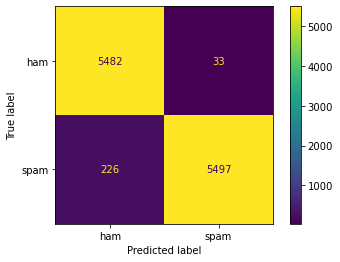

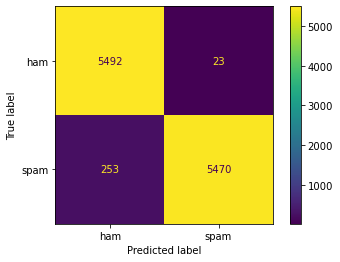

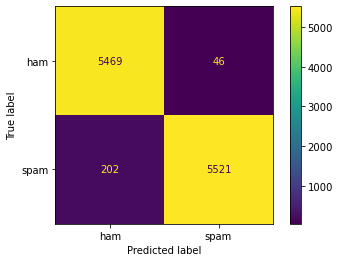

In [54]:
# Iterate through fold 1, 2, and 3
for cv in [1, 2, 3]:

    # When cv = 1, fold 1 & and 2 are used for training and fold 3 is used for testing
    if cv == 1:
        X_train = emaildf[emaildf.CVSet != 3].RawEmail
        X_test = emaildf[emaildf.CVSet == 3].RawEmail
        y_train = emaildf[emaildf.CVSet != 3].Label
        y_test = emaildf[emaildf.CVSet == 3].Label

    # When cv = 2, fold 2 & 3 are used for training and fold 1 is used for testing
    elif cv == 2:
        X_train = emaildf[emaildf.CVSet != 1].RawEmail
        X_test = emaildf[emaildf.CVSet == 1].RawEmail
        y_train = emaildf[emaildf.CVSet != 1].Label
        y_test = emaildf[emaildf.CVSet == 1].Label

    # When cv = 3, fold 3 & 1 are used for training and fold 2 is used for testing
    else:
        X_train = emaildf[emaildf.CVSet != 2].RawEmail
        X_test = emaildf[emaildf.CVSet == 2].RawEmail
        y_train = emaildf[emaildf.CVSet != 2].Label
        y_test = emaildf[emaildf.CVSet == 2].Label

    # Vectorize the train data
    X_train_vec = vectorizer.fit_transform(X_train)

    # Vectorize the test data
    X_test_vec = vectorizer.transform(X_test)

    # Initiate a multinomial naive bayes model
    model = MultinomialNB()

    # Fit the model on the train data
    model.fit(X_train_vec, y_train)

    # Make predictions based on the test data
    y_pred = model.predict(X_test_vec)

    # Print out the classification report for the current fold
    print("Fold ", cv, " Classification Report:", "\n")
    print(classification_report(y_test, y_pred, digits = 4), "\n")

    # Print out a confusion matrix for the current fold
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ["ham", "spam"]).plot()

    # Create a dataframe with ham and spam log probabilities by word
    feature_log_ratio = pandas.DataFrame(list(zip(
    model.feature_log_prob_[0],
    model.feature_log_prob_[1],
    vectorizer.get_feature_names_out())),
    columns = ["ham", "spam", "token"])

    # Add a column for the ratio
    feature_log_ratio["ratio"] = feature_log_ratio["ham"] / feature_log_ratio["spam"]

    # Sort the dataframe by ratio in descending order
    feature_log_ratio.sort_values(by = "ratio", ascending = False, inplace = True)

    # Print out the top 100
    print("Fold ", cv, " Top 100 Most Informative Features for Spam Emails", "\n")
    print(list(feature_log_ratio.head(100).token), "\n")

    # Print out the bottom 100
    print("Fold ", cv, " Top 100 Most Informative Features for Ham Emails", "\n")
    print(list(feature_log_ratio.tail(100).token), "\n")

<p>&nbsp;</p>

### **Experiment 3 Summary Table**

<font size = "5">

Average accuracy = 97.68%

**Class** | **Measure** | **Average** |  
----------|-------------|-------------|  
ham       | precision   | 96.03%
spam      | precision   | 99.38%
ham       | recall      | 99.38%
spam      | recall      | 96.03%
ham       | f-measure   | 97.67%
spam      | f-measure   | 97.68%

<p>&nbsp;</p>

<font size = "5">

The accuracy in this model decreased a little bit more than the model from experiment 2. Even though the accuracy is lower, the results might be more desireable. The number of Type I misclassifications (about 34 on average) is about half as much as the number of type I misclassifications in experiment 1 (about 61 on average). Why is this a good thing? Well, if a legit email goes into your spam folder, you might never see it. On the other hand, if a spam email goes into your inbox, it is not that big of a deal you just move it into your spam folder. So, in this model, we see that removing the stopwords improved the Type I error but at the expense of the Type II error. In other words, with this model, you can be more confident that your emails are not accidently going into the spam folder, but you can expect to be seeing more spam in your inbox.

<p>&nbsp;</p>

### **Experiment 4: Part of Speech (POS) Tagging**

<p>&nbsp;</p>

<font size = "5">

In experiment 4, I will shift gears away from training the model using the text of the emails and instead train the model using part of speech tags. I would venture to say that the grammar in spam emails is different than ham emails. For example, maybe spam emails tend to use a bunch of adjectives since they are trying to hype up their product or whatever it is that they are trying to get you to do. Will it be enough to beat the accuracy scores of the other models? We will find out next.

<p>&nbsp;</p>

In [56]:
# Tokenize the emails
email_tokens = []
for email in emaildf.RawEmail:
    email_tokens.append(nltk.word_tokenize(email))

In [57]:
# POS tag the tokenized emails
email_tags = []
for token_list in email_tokens:
    email_tags.append(nltk.pos_tag(token_list))

In [64]:
# Extract just the POS tags
tags_only = []
for pos_list in email_tags:
    tag_list = []
    for pos_pair in pos_list:
        tag_list.append(pos_pair[1])
    tags_only.append(tag_list)

In [68]:
# Flatten the lists of POS tags into a strings
pos_strings = []
for pos_list in tags_only:
    pos_strings.append(" ".join(pos_list))

In [69]:
# Print out an example of a POS string
print(pos_strings[1000], "\n")

JJ : NN NNS TO VB NN NN , NN CC NN VBD RP IN DT NNS IN DT IN NN : JJ NN NN CC NN NN CD . CD NN NN NN CC NN CD . CD NN NN NN VBD CD NN NN CD NN NN CD . CD NN NN CD . CD NN NN CD . CD NN JJ CD NN 



In [70]:
# Add the POS string list to the email df
emaildf["POS"] = pos_strings

In [71]:
# Initiate a vectorizer
vectorizer = CountVectorizer(encoding = "latin-1")

Fold  1  Classification Report: 

              precision    recall  f1-score   support

         ham     0.7734    0.6602    0.7123      5515
        spam     0.7130    0.8136    0.7600      5723

    accuracy                         0.7383     11238
   macro avg     0.7432    0.7369    0.7361     11238
weighted avg     0.7426    0.7383    0.7366     11238
 

Fold  1  Top 100 Most Informative Features for Spam Emails 

['jj', 'jjs', 'rbs', 'jjr', 'fw', 'prp', 'sym', 'pdt', 'nns', 'rb', 'cc', 'rbr', 'uh', 'nn', 'vbz', 'vbg', 'vbp', 'wrb', 'wdt', 'nnps', 'dt', 'wp', 'vbn', 'vbd', 'in', 'rp', 'vb', 'pos', 'to', 'ex', 'md', 'nnp', 'cd', 'ls'] 

Fold  1  Top 100 Most Informative Features for Ham Emails 

['jj', 'jjs', 'rbs', 'jjr', 'fw', 'prp', 'sym', 'pdt', 'nns', 'rb', 'cc', 'rbr', 'uh', 'nn', 'vbz', 'vbg', 'vbp', 'wrb', 'wdt', 'nnps', 'dt', 'wp', 'vbn', 'vbd', 'in', 'rp', 'vb', 'pos', 'to', 'ex', 'md', 'nnp', 'cd', 'ls'] 

Fold  2  Classification Report: 

              precision    rec

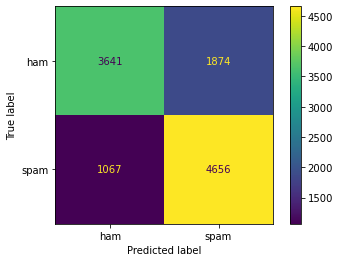

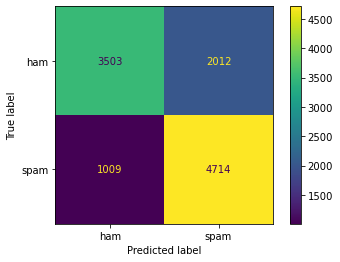

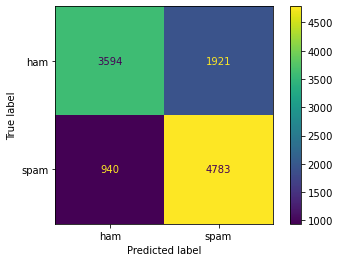

In [72]:
# Iterate through fold 1, 2, and 3
for cv in [1, 2, 3]:

    # When cv = 1, fold 1 & and 2 are used for training and fold 3 is used for testing
    if cv == 1:
        X_train = emaildf[emaildf.CVSet != 3].POS
        X_test = emaildf[emaildf.CVSet == 3].POS
        y_train = emaildf[emaildf.CVSet != 3].Label
        y_test = emaildf[emaildf.CVSet == 3].Label

    # When cv = 2, fold 2 & 3 are used for training and fold 1 is used for testing
    elif cv == 2:
        X_train = emaildf[emaildf.CVSet != 1].POS
        X_test = emaildf[emaildf.CVSet == 1].POS
        y_train = emaildf[emaildf.CVSet != 1].Label
        y_test = emaildf[emaildf.CVSet == 1].Label

    # When cv = 3, fold 3 & 1 are used for training and fold 2 is used for testing
    else:
        X_train = emaildf[emaildf.CVSet != 2].POS
        X_test = emaildf[emaildf.CVSet == 2].POS
        y_train = emaildf[emaildf.CVSet != 2].Label
        y_test = emaildf[emaildf.CVSet == 2].Label

    # Vectorize the train data
    X_train_vec = vectorizer.fit_transform(X_train)

    # Vectorize the test data
    X_test_vec = vectorizer.transform(X_test)

    # Initiate a multinomial naive bayes model
    model = MultinomialNB()

    # Fit the model on the train data
    model.fit(X_train_vec, y_train)

    # Make predictions based on the test data
    y_pred = model.predict(X_test_vec)

    # Print out the classification report for the current fold
    print("Fold ", cv, " Classification Report:", "\n")
    print(classification_report(y_test, y_pred, digits = 4), "\n")

    # Print out a confusion matrix for the current fold
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ["ham", "spam"]).plot()

    # Create a dataframe with ham and spam log probabilities by word
    feature_log_ratio = pandas.DataFrame(list(zip(
    model.feature_log_prob_[0],
    model.feature_log_prob_[1],
    vectorizer.get_feature_names_out())),
    columns = ["ham", "spam", "token"])

    # Add a column for the ratio
    feature_log_ratio["ratio"] = feature_log_ratio["ham"] / feature_log_ratio["spam"]

    # Sort the dataframe by ratio in descending order
    feature_log_ratio.sort_values(by = "ratio", ascending = False, inplace = True)

    # Print out the top 100
    print("Fold ", cv, " Top 100 Most Informative Features for Spam Emails", "\n")
    print(list(feature_log_ratio.head(100).token), "\n")

    # Print out the bottom 100
    print("Fold ", cv, " Top 100 Most Informative Features for Ham Emails", "\n")
    print(list(feature_log_ratio.tail(100).token), "\n")

<p>&nbsp;</p>

### **Experiment 4 Summary Table**

<font size = "5">

Average accuracy = 73.83%

**Class** | **Measure** | **Average** |  
----------|-------------|-------------|  
ham       | precision   | 78.08%
spam      | precision   | 70.91%
ham       | recall      | 64.90%
spam      | recall      | 82.44%
ham       | f-measure   | 70.88%
spam      | f-measure   | 76.24%

<p>&nbsp;</p>

<font size = "5">

The POS tags were not as informative as I thought they would be. As you can see by looking at the most informative features that were printed out, both the spam emails and the ham emails had a lot of the same most informative features. This explains why there was confusion in the model. The model was not able to classify spam emails very well based solely on the part of speech tags. It did learn something, however, so maybe this knowledge could be combined with the email text to build an even better model, but I will save that exercise for another day.

<p>&nbsp;</p>

### **Project Conclusion**

<p>&nbsp;</p>

<font size = "5">

A lot has been covered in this project. To recap, I started off by exploring the email spam data, processed it in different ways, trained several different naive bayes classifiers, and interpreted their results. There were a total of 4 experiments conducted, with each experiment taking on a different approach. Throughout the experiments, I tested my hypotheses and took a detailed look at the results of each trained model.

The margins of accuracy were razor thin, with only slight differences from model to model. Precision, Recall, and F1 scores helped to highlight where the errors occurred in the models. By analyzing the results in this way, I learned that models can be trained in different ways to be tailored for a specific outcome. For example, it might make sense to use a model that has a slightly lower accuracy score overall but performs better on Type I errors. I make this argument in the spam detection task because it is more important to ensure that legit emails are not accidently sent to the spam folder rather than spam emails accidently getting sent to the inbox folder.

While I am pleased with the results of the project, I still feel that there is some unfinished business. Unfortunately, due to time constraints, I was not able to run anymore experiments. One experiment that I would have liked to run would be to put everything together into one classifier (i.e. the email text, the email subject, the pos tags, and other features). It would be interesting to see if combining the features would lead to better results or if it would just cause the curse of dimensionality and end up hindering the results. With that being said, I feel that there is definitely room for improvement.

This project just scratches the surface on how spam detection models are built. In the real world, there is much more that would go into it. For example, huge tech companies that provide email services such as Google (gmail) or Microsoft (outlook) would try out different models, tune the hyperparameters in the models, and ensure that the models run extremely fast. Not to mention, spammers are constantly trying to figure out new ways to trick the system, so the models need to be smart enough to adapt.



<p>&nbsp;</p>